In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import randint

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import io
import os
import pandas as pd


def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str, 'Format':str, '1001_1001':str, '1002_1002':str, '1003_1003':str,
               '1004_1004':str, '1005_1005':str, '1006_1006':str, '1007_1007':str, '1008_1008':str,
               '1009_1009':str, '1010_1010':str, '1011_1011':str, '1012_1012':str, '1013_1013':str,
               '1014_1014':str,'1015_1015':str, '1016_1016':str, '1017_1017':str, '1018_1018':str, 
               '1019_1019':str, '1020_1020':str, '1021_1021':str, '1022_1022':str, '1023_1023':str,
               '1024_1024':str, '1025_1025':str, '1026_1026':str, '1027_1027':str, 
               '1028_1028':str, '1029_1029':str, '1030_1030':str, '1031_1031':str, '1032_1032':str, '1033_1033':str,
               '1034_1034':str, '1035_1035':str, '1036_1036':str, '1037_1037':str, '1038_1038':str, '1039_1039':str,
               '1040_1040':str, '1041_1041':str, '1042_1042':str,'1043_1043':str, '1044_1044':str, '1045_1045':str,
               '1046_1046':str, '1047_1047':str,'1048_1048':str,'1049_1049':str, '1050_1050':str,'1051_1051':str,
               '1052_1052':str, '1053_1053':str, '1054_1054':str, '1055_1055':str, '1056_1056':str,'1057_1057':str,
               '1058_1058':str, '1059_1059':str,'1060_1060':str, '1061_1061':str, '1062_1062':str, '1063_1063':str,
               '1064_1064':str,'1065_1065':str, '1066_1066':str, '1067_1067':str,'1068_1068':str, '1069_1069':str,
               '1070_1070':str, '1071_1071':str, '1072_1072':str,'1073_1073':str, '1074_1074':str,
               '1075_1075':str,'1076_1076':str,'1077_1077':str,'1078_1078':str,'1079_1079':str,'1080_1080':str,'1081_1081':str,
               '1082_1082':str,'1083_1083':str,'1084_1084':str,'1085_1085':str,'1086_1086':str,'1087_1087':str,'1088_1088':str,'1089_1089':str,
               '1090_1090':str,'1091_1091':str,'1092_1092':str,'1093_1093':str,'1094_1094':str,'1095_1095':str,'1096_1096':str,'1097_1097':str,
               '1098_1098':str,'1099_1099':str,'1100_1100':str,'1101_1101':str,'1102_1102':str,'1103_1103':str,'1104_1104':str,'1105_1105':str,
               '1106_1106':str,'1107_1107':str,'1108_1108':str,'1109_1109':str,'1110_1110':str,'1111_1111':str,'1112_1112':str,'1113_1113':str,
               '1114_1114':str,'1115_1115':str,'1116_1116':str,'1117_1117':str,'1118_1118':str,'1119_1119':str,'1120_1120':str,'1121_1121':str,
               '1122_1122':str,'1123_1123':str,'1124_1124':str,'1125_1125':str,'1126_1126':str,'1127_1127':str,'1128_1128':str,'1129_1129':str,
               '1130_1130':str,'1131_1131':str,'1132_1132':str,'1133_1133':str,'1134_1134':str,'1135_1135':str,'1136_1136':str,'1137_1137':str,
               '1138_1138':str,'1139_1139':str,'1140_1140':str,'1141_1141':str,'1142_1142':str,'1143_1143':str,'1144_1144':str,'1145_1145':str,
               '1146_1146':str,'1147_1147':str,'1148_1148':str,'1149_1149':str,'1150_1150':str,'1151_1151':str,'1152_1152':str,'1153_1153':str,
               '1154_1154':str,'1155_1155':str,'1156_1156':str,'1157_1157':str,'1158_1158':str,'1159_1159':str,'1160_1160':str,'1161_1161':str,
               '1162_1162':str,'1163_1163':str,'1164_1164':str,'1165_1165':str,'1166_1166':str,'1167_1167':str,'1168_1168':str,'1169_1169':str,
               '1170_1170':str,'1171_1171':str,'1172_1172':str,'1173_1173':str,'1174_1174':str,'1175_1175':str,'1176_1176':str},        
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

In [5]:
df = read_vcf("genotypes.vcf")
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,1001_1001,...,1167_1167,1168_1168,1169_1169,1170_1170,1171_1171,1172_1172,1173_1173,1174_1174,1175_1175,1176_1176
0,1,558185,rs9699599,A,G,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
1,1,740098,rs12138618,G,A,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
2,1,744045,rs3131969,A,G,.,.,PR,GT,0/1,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1,0/0
3,1,767376,rs6672353,G,A,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
4,1,851671,rs13302982,A,G,.,.,PR,GT,0/1,...,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256891,22,49411684,rs762672,C,T,.,.,PR,GT,0/1,...,0/1,0/1,0/1,0/0,0/1,0/0,0/1,0/1,0/0,0/1
256892,22,49417023,rs131711,G,C,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
256893,22,49486501,rs2341011,T,C,.,.,PR,GT,1/1,...,0/1,1/1,0/1,1/1,0/1,0/0,1/1,1/1,0/1,0/1
256894,22,49503532,rs9628187,C,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1,0/1


In [334]:
# df.columns.values

In [12]:
df_2 = pd.read_csv("plink/genotypes.eigenvec", sep = " ", names= ['FamilyID', 'IndividualID', 'PC1', 'PC2','PC3','PC4','PC5',
                                                                 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14',
                                                                  'PC15','PC16','PC17','PC18','PC19','PC20'])

In [24]:
df_2

,FamilyID,IndividualID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1001_1001,1001_1001,-0.011308,-0.049610,-0.072624,-0.023323,0.043175,-0.048728,-0.127978,0.191397,...,0.096545,-0.153678,0.071009,-0.005070,-0.051850,-0.124780,-0.150898,-0.084354,-0.153340,-0.011041
1,1002_1002,1002_1002,-0.004055,-0.040953,-0.057589,-0.015546,0.035741,-0.043017,-0.087314,0.134233,...,0.064964,-0.118097,0.053080,0.000554,-0.034731,-0.093265,-0.106108,-0.051624,-0.102059,-0.012970
2,1003_1003,1003_1003,-0.013342,-0.038246,-0.050396,-0.014688,0.025219,-0.034451,-0.101281,0.150250,...,0.074239,-0.109622,0.049124,-0.008641,-0.045960,-0.083171,-0.108233,-0.071087,-0.123823,-0.002551
3,1004_1004,1004_1004,0.031194,0.049359,-0.030773,-0.061488,-0.124069,-0.107076,-0.095445,0.056787,...,-0.068472,0.190799,-0.043879,0.009271,0.065305,0.164456,0.126833,0.143317,-0.153845,0.224120
4,1005_1005,1005_1005,0.022213,0.030567,-0.021987,-0.051198,-0.093088,-0.068852,-0.054301,0.043353,...,-0.041638,0.139004,-0.015425,0.006282,0.049240,0.121767,0.100896,0.107745,-0.116885,0.157878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1172_1172,1172_1172,0.016668,-0.006058,-0.027844,0.063584,-0.087714,-0.108294,0.055890,-0.033144,...,0.069430,0.035812,0.056635,0.060608,0.039017,-0.026272,0.041630,0.008775,0.020674,-0.142412
172,1173_1173,1173_1173,0.022931,0.013074,-0.018204,0.066837,-0.099133,-0.098718,0.049424,-0.051004,...,0.085260,0.034335,0.055187,0.077056,0.049599,-0.013411,0.050939,0.003113,0.007984,-0.148249
173,1174_1174,1174_1174,0.018969,-0.026133,-0.017855,0.050315,0.025578,-0.090791,0.156150,-0.136859,...,-0.028247,-0.038486,0.060150,-0.099417,-0.073490,-0.059118,-0.049275,-0.129680,0.063625,0.088822
174,1175_1175,1175_1175,0.010821,-0.015036,-0.006342,0.026647,0.023291,-0.066618,0.110722,-0.088053,...,-0.020084,-0.035794,0.044745,-0.068716,-0.057270,-0.046110,-0.040691,-0.093583,0.050406,0.059395


In [15]:
df_2.iloc[:, 1:4]

,IndividualID,PC1,PC2
0,1001_1001,-0.011308,-0.049610
1,1002_1002,-0.004055,-0.040953
2,1003_1003,-0.013342,-0.038246
3,1004_1004,0.031194,0.049359
4,1005_1005,0.022213,0.030567
...,...,...,...
171,1172_1172,0.016668,-0.006058
172,1173_1173,0.022931,0.013074
173,1174_1174,0.018969,-0.026133
174,1175_1175,0.010821,-0.015036


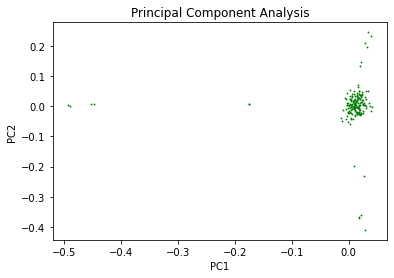

In [26]:
PC1 = df_2.iloc[:, 2]
PC2 = df_2.iloc[:, 3]
plt.scatter(PC1, PC2, s = 0.7, c = 'green')
plt.title("Principal Component Analysis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [78]:
df_2.iloc[:, 0:12]

,FamilyID,IndividualID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1001_1001,1001_1001,-0.011308,-0.049610,-0.072624,-0.023323,0.043175,-0.048728,-0.127978,0.191397,-0.085580,0.055663
1,1002_1002,1002_1002,-0.004055,-0.040953,-0.057589,-0.015546,0.035741,-0.043017,-0.087314,0.134233,-0.057710,0.042829
2,1003_1003,1003_1003,-0.013342,-0.038246,-0.050396,-0.014688,0.025219,-0.034451,-0.101281,0.150250,-0.068734,0.041801
3,1004_1004,1004_1004,0.031194,0.049359,-0.030773,-0.061488,-0.124069,-0.107076,-0.095445,0.056787,-0.026286,-0.125971
4,1005_1005,1005_1005,0.022213,0.030567,-0.021987,-0.051198,-0.093088,-0.068852,-0.054301,0.043353,-0.016498,-0.093103
...,...,...,...,...,...,...,...,...,...,...,...,...
171,1172_1172,1172_1172,0.016668,-0.006058,-0.027844,0.063584,-0.087714,-0.108294,0.055890,-0.033144,-0.211715,-0.184366
172,1173_1173,1173_1173,0.022931,0.013074,-0.018204,0.066837,-0.099133,-0.098718,0.049424,-0.051004,-0.206275,-0.200317
173,1174_1174,1174_1174,0.018969,-0.026133,-0.017855,0.050315,0.025578,-0.090791,0.156150,-0.136859,0.207444,-0.225380
174,1175_1175,1175_1175,0.010821,-0.015036,-0.006342,0.026647,0.023291,-0.066618,0.110722,-0.088053,0.136674,-0.156504


In [80]:
df_2.iloc[:, 0:12].to_csv("top_10_PC.txt")

In [333]:
df_3 = open("plink/allele_freq.frq")
df_3 = df_3.readlines()

In [68]:
df_3 = pd.read_table('plink/allele_freq.frq', sep='\s+')
df_3

,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,rs9699599,G,A,0.11630,172
1,1,rs12138618,A,G,0.05747,174
2,1,rs3131969,G,A,0.30300,330
3,1,rs6672353,A,G,0.12210,172
4,1,rs13302982,G,A,0.27540,334
...,...,...,...,...,...,...
256891,22,rs762672,T,C,0.22160,334
256892,22,rs131711,C,G,0.06790,162
256893,22,rs2341011,C,T,0.48300,352
256894,22,rs9628187,T,C,0.22750,334


In [70]:
x = df_3["MAF"]

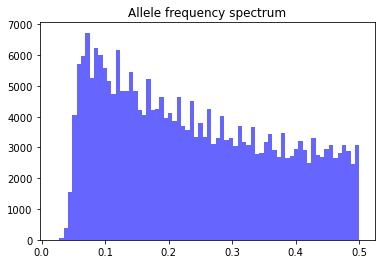

In [75]:
plt.hist(x, bins = 70, color = "blue", alpha = 0.6)
plt.title("Allele frequency spectrum")
plt.show()

In [76]:
df_3

,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,rs9699599,G,A,0.11630,172
1,1,rs12138618,A,G,0.05747,174
2,1,rs3131969,G,A,0.30300,330
3,1,rs6672353,A,G,0.12210,172
4,1,rs13302982,G,A,0.27540,334
...,...,...,...,...,...,...
256891,22,rs762672,T,C,0.22160,334
256892,22,rs131711,C,G,0.06790,162
256893,22,rs2341011,C,T,0.48300,352
256894,22,rs9628187,T,C,0.22750,334


In [82]:
import statsmodels.api as sm
import pylab as py

In [144]:
CB1908 = pd.read_table('CB1908_IC50.qassoc', sep='\s+')
GS451 = pd.read_table("GS451_IC50.qassoc", sep='\s+')

In [356]:
CCB1908_pTrans = -np.log10(CB1908["P"])
GS451_pTrans = -np.log10(GS451["P"])

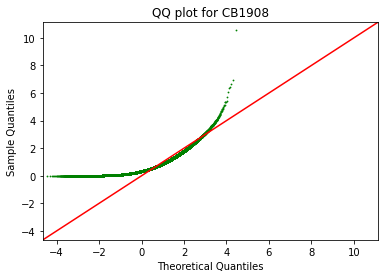

In [357]:
sm.qqplot(CCB1908_pTrans, line ='45', markersize = 0.8, color = "green")
plt.title("QQ plot for CB1908")
py.show()

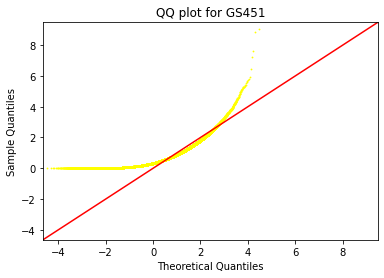

In [358]:
sm.qqplot(GS451_pTrans, line ='45', markersize = 0.8, color = "yellow")
plt.title("QQ plot for GS451")
py.show()

In [146]:
CB1908["-log10pvalue"] = -np.log10(CB1908["P"])

In [332]:
CB1908.CHR = CB1908.CHR.astype('category')
CB1908.CHR = CB1908.CHR.cat.set_categories(range(1,23), ordered = True)
CB1908 = CB1908.sort_values('CHR')
sig = CB1908[CB1908["-log10pvalue"] > 5]

In [169]:
CB1908['ind'] = range(len(CB1908))
CB1908_grouped = CB1908.groupby(('CHR'))

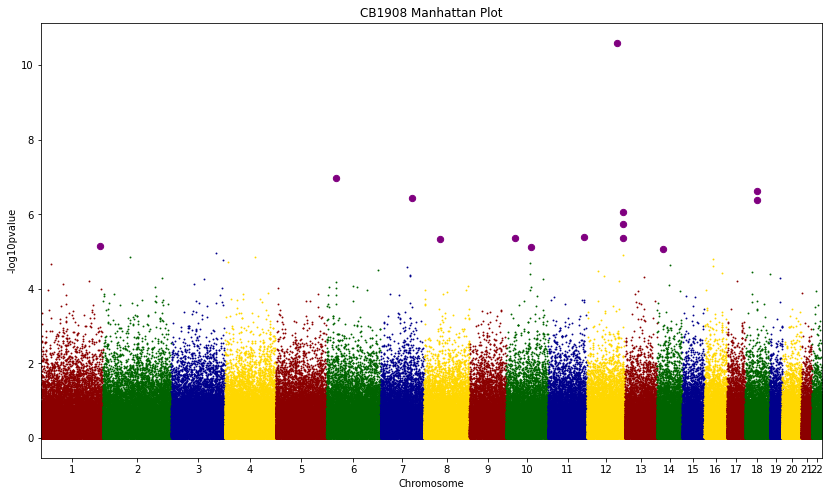

In [184]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(CB1908_grouped):
    group.plot(kind='scatter', x='ind', y='-log10pvalue',color=colors[num % len(colors)], ax=ax, s=0.8)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.scatter(x = sig["ind"], y = sig["-log10pvalue"], color = "purple", s = 40)
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
# ax.set_ylim([0, 7])
ax.set_xlabel('Chromosome')
ax.set_title("CB1908 Manhattan Plot")
plt.show()

In [331]:
# CB1908.CHR

In [330]:
# sig_2

In [329]:
sig_2 = GS451[GS451["-log10pvalue"] > 5]

/Users/cmdb/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


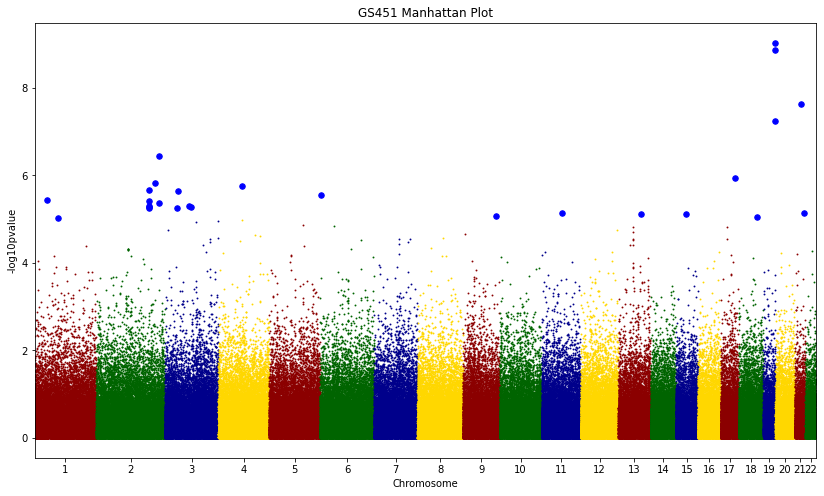

In [224]:
GS451["-log10pvalue"] = -np.log10(GS451["P"])
GS451a = GS451[GS451["-log10pvalue"] <= 5]
GS451a.CHR = GS451a.CHR.astype('category')
GS451a.CHR = GS451a.CHR.cat.set_categories(range(1,23), ordered = True)
GS451a = GS451a.sort_values('CHR')
GS451a['ind'] = range(len(GS451a))
GS451a_grouped = GS451a.groupby(('CHR'))
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen','darkblue', 'gold']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(GS451a_grouped):
    group.plot(kind='scatter', x='ind', y='-log10pvalue',color=colors[num % len(colors)], ax=ax, s=0.8)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.scatter(x = sig_2["ind"], y = sig_2["-log10pvalue"], color = "blue", s = 30)
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_xlabel('Chromosome')
ax.set_title("GS451 Manhattan Plot")
plt.show()

In [225]:
sig_2

,CHR,SNP,BP,NMISS,BETA,SE,R2,T,P,-log10pvalue,ind
12571,1,rs7547739,166604015,175,1.856,0.3878,0.1169,4.786,3.630000e-06,5.440093,4250
16057,1,rs17046753,204754509,87,1.846,0.3915,0.2073,4.715,9.361000e-06,5.028678,7687
30157,2,rs10170982,101592772,173,-1.825,0.3717,0.1236,-4.910,2.110000e-06,5.675718,37591
30160,2,rs12622974,101600032,175,-1.759,0.3730,0.1139,-4.715,4.951000e-06,5.305307,37605
30161,2,rs17025871,101600219,175,-1.715,0.3596,0.1162,-4.769,3.910000e-06,5.407823,37608
30158,2,rs10186803,101594055,166,-1.713,0.3633,0.1193,-4.714,5.156000e-06,5.287687,37696
30162,2,rs13394005,101600574,174,-1.754,0.3743,0.1132,-4.685,5.653000e-06,5.247721,37718
30774,2,rs1582657,107458116,163,1.329,0.2662,0.1341,4.993,1.530000e-06,5.815309,39457
26130,2,rs1358578,51626897,166,2.111,0.3977,0.1466,5.307,3.571000e-07,6.447210,40823
26127,2,rs2698032,51619359,89,2.746,0.5597,0.2167,4.906,4.289000e-06,5.367644,40826


240915	19	rs7257475	20372113	88	-3.008	0.4375	0.3547	-6.876	9.311000e-10	9.031004	243567

In [242]:
df[df["ID"] == "rs7257475"]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,1001_1001,...,1167_1167,1168_1168,1169_1169,1170_1170,1171_1171,1172_1172,1173_1173,1174_1174,1175_1175,1176_1176
240915,19,20372113,rs7257475,A,T,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.


In [260]:
GS451_pheno = pd.read_table("GS451_IC50.txt", sep='\s+')
GS451_pheno

,FID,IID,GS451_IC50
0,1001,1001,5.594256
1,1002,1002,8.525633
2,1003,1003,12.736739
3,1004,1004,12.175201
4,1005,1005,9.936742
...,...,...,...
171,1172,1172,5.724618
172,1173,1173,5.603924
173,1174,1174,7.064706
174,1175,1175,6.715907


In [264]:
GWAS = df.iloc[240915, 9:]
len(GWAS)
GWAS

1001_1001    0/0
1002_1002    0/0
1003_1003    0/0
1004_1004    0/0
1005_1005    0/0
            ... 
1172_1172    ./.
1173_1173    ./.
1174_1174    ./.
1175_1175    ./.
1176_1176    ./.
Name: 240915, Length: 176, dtype: object

In [317]:
WT = []
Homo = []
Hetero = []
NA = []
for i in range(0, len(GWAS)):
    if GWAS[i] == './.':
        NA.append(GWAS.index[i][0:4])
    elif GWAS[i] == '0/0':
        WT.append(GWAS.index[i][0:4])
    elif GWAS[i] == '0/1' or i == '1/0':
        Hetero.append(GWAS.index[i][0:4])
    else: 
        Homo.append(GWAS.index[i][0:4])

In [320]:
for i in range(0, len(NA)):
    NA[i] = int(NA[i])
for i in range(0, len(WT)):
    WT[i] = int(WT[i])
for i in range(0, len(Hetero)):
    Hetero[i] = int(Hetero[i])
for i in range(0, len(Homo)):
    Homo[i] = int(Homo[i])

In [335]:
WTd = []
for t in range(0, 175):
    if GS451_pheno["FID"][t] in WT:
        WTd.append(GS451_pheno.iloc[t,:][2])
WTd.remove(WTd[16])

In [300]:
NAd = []
for t in range(0, 175):
    if GS451_pheno["FID"][t] in NA:
        NAd.append(GS451_pheno.iloc[t,:][2])
Heterod = []
for t in range(0, 175):
    if GS451_pheno["FID"][t] in NA:
        Heterod.append(GS451_pheno.iloc[t,:][2])
Homod = []
for t in range(0, 175):
    if GS451_pheno["FID"][t] in NA:
        Homod.append(GS451_pheno.iloc[t,:][2])

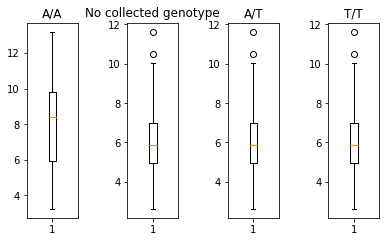

In [353]:
fig, axs = plt.subplots(1,4)
axs[0].boxplot(WTd)
axs[0].set_title("A/A")
axs[1].boxplot(NAd)
axs[1].set_title("No collected genotype")
axs[2].boxplot(Heterod)
axs[2].set_title("A/T")
axs[3].boxplot(Homod)
axs[3].set_title("T/T")
fig.tight_layout(pad = 3.0)
plt.show()